In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auto=pd.read_csv(r'C:\Users\arpna\Desktop\Data science\Projects\auto-mpg.csv', na_values=['?'])
auto.head()
auto.drop('car name',axis=1, inplace=True)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [3]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [4]:
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)

In [5]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

# K Nearest Neighbour

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn=KNeighborsClassifier()   #Shift+tab is used to see what it is taking as default

In [8]:
X=auto.drop(columns='origin')
y=auto['origin']

In [9]:
knn.fit(X,y)

KNeighborsClassifier()

In [10]:
knn.classes_   #classes that we are predicting under origin

array([1, 2, 3], dtype=int64)

In [11]:
knn_predict=knn.predict(X)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y,knn_predict)

0.8065326633165829

In [14]:
knn.score(X,y)   #Here it shows Accuracy

0.8065326633165829

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
knn1=KNeighborsClassifier()

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1111)

In [18]:
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_predict=knn1.predict(X_test)

In [20]:
y_predict

array([1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3, 3, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3,
       1, 3, 1, 1, 3, 1, 3, 3, 1, 1], dtype=int64)

In [21]:
y_test

83     1
113    1
65     1
127    1
1      1
      ..
381    3
313    1
325    2
272    1
274    2
Name: origin, Length: 120, dtype: int64

In [22]:
knn1.score(X_test,y_test)

0.7166666666666667

In [23]:
accuracy_score(y_test,y_predict)

0.7166666666666667

## Finding optimal no. of Neighbors

In [24]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(1,40):
    knn_new=KNeighborsClassifier(n_neighbors =i)   #changing no. of k values in this function
    knn_new.fit(X_test,y_test)
    knn_new_predict=knn_new.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_new_predict))

In [25]:
accuracy

[1.0,
 0.8166666666666667,
 0.7833333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7166666666666667,
 0.7333333333333333,
 0.75,
 0.7583333333333333,
 0.75,
 0.7333333333333333,
 0.725,
 0.7333333333333333,
 0.7166666666666667,
 0.7333333333333333,
 0.7416666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7416666666666667,
 0.7416666666666667,
 0.7333333333333333,
 0.7166666666666667,
 0.7333333333333333,
 0.7166666666666667,
 0.7333333333333333,
 0.7083333333333334,
 0.7083333333333334,
 0.7083333333333334,
 0.7166666666666667,
 0.675,
 0.7416666666666667,
 0.7333333333333333,
 0.7166666666666667,
 0.725,
 0.7083333333333334,
 0.7083333333333334,
 0.7083333333333334]

# Accuracy vs no. of neighbors graph

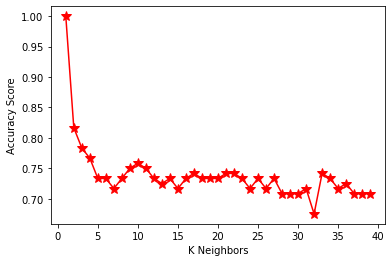

In [26]:
plt.plot(range(1,40),accuracy, marker='*',ms=10,color='red')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Score')
plt.show()

# Label Encoder

In [27]:
sample=pd.DataFrame({'Gender':['m','f','f','m','f'],'Marks':[20,19,21,24,17],'Pass':['yes','no','no','yes','yes']})

In [28]:
sample2=sample.copy()
sample.head()

,Gender,Marks,Pass
0,m,20,yes
1,f,19,no
2,f,21,no
3,m,24,yes
4,f,17,yes


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
sample['Gender']=le.fit_transform(sample['Gender'])

In [32]:
sample

,Gender,Marks,Pass
0,1,20,yes
1,0,19,no
2,0,21,no
3,1,24,yes
4,0,17,yes


In [33]:
sample['Pass']=le.fit_transform(sample['Pass'])

In [34]:
sample

,Gender,Marks,Pass
0,1,20,1
1,0,19,0
2,0,21,0
3,1,24,1
4,0,17,1


In [35]:
sample2

,Gender,Marks,Pass
0,m,20,yes
1,f,19,no
2,f,21,no
3,m,24,yes
4,f,17,yes


# Binarisation or OneHotEncoder

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
ohe=OneHotEncoder()

In [38]:
ohe.fit_transform(sample2[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [39]:
ohe.categories_

[array(['f', 'm'], dtype=object)]

In [40]:
ohe.categories_[0]

array(['f', 'm'], dtype=object)

In [41]:
ohe_gender=pd.DataFrame(ohe.fit_transform(sample2[['Gender']]).toarray(),
                        columns=ohe.categories_[0])

In [42]:
ohe_gender

,f,m
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [43]:
ohe_pass=pd.DataFrame(ohe.fit_transform(sample2[['Pass']]).toarray(),
                        columns=ohe.categories_[0])

In [44]:
ohe_pass

,no,yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [45]:
sample3=sample2.join([ohe_gender,ohe_pass])

In [46]:
sample3

,Gender,Marks,Pass,f,m,no,yes
0,m,20,yes,0.0,1.0,0.0,1.0
1,f,19,no,1.0,0.0,1.0,0.0
2,f,21,no,1.0,0.0,1.0,0.0
3,m,24,yes,0.0,1.0,0.0,1.0
4,f,17,yes,1.0,0.0,0.0,1.0


In [47]:
sample3.drop(columns=['Gender','Pass'], inplace= True)

In [48]:
sample3

,Marks,f,m,no,yes
0,20,0.0,1.0,0.0,1.0
1,19,1.0,0.0,1.0,0.0
2,21,1.0,0.0,1.0,0.0
3,24,0.0,1.0,0.0,1.0
4,17,1.0,0.0,0.0,1.0


# get_dummies function

In [49]:
pd.get_dummies(sample2)   #this function will itself do the function of OneHotEncoder in one line

,Marks,Gender_f,Gender_m,Pass_no,Pass_yes
0,20,0,1,0,1
1,19,1,0,1,0
2,21,1,0,1,0
3,24,0,1,0,1
4,17,1,0,0,1


## Titanic- Logarithmic regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lrg=LogisticRegression()

In [52]:
lrg.fit(X_train, y_train)

C:\Users\arpna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
lrg_predict=lrg.predict(X_test)

In [54]:
accuracy_score(y_test,lrg_predict)

0.8083333333333333

In [55]:
lrg.score(X_test,y_test)

0.8083333333333333

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,lrg_predict)

array([[73,  0,  9],
       [ 3, 10,  7],
       [ 3,  1, 14]], dtype=int64)

In [58]:
knn_c=KNeighborsClassifier(3)

In [59]:
knn_c.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
knn_c_predict=knn_c.predict(X_test)

In [61]:
confusion_matrix(y_test,knn_c_predict)

array([[74,  4,  4],
       [ 8,  6,  6],
       [10,  1,  7]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,lrg_predict))

              precision    recall  f1-score   support

           1       0.92      0.89      0.91        82
           2       0.91      0.50      0.65        20
           3       0.47      0.78      0.58        18

    accuracy                           0.81       120
   macro avg       0.77      0.72      0.71       120
weighted avg       0.85      0.81      0.81       120



In [64]:
print(classification_report(y_test,knn_c_predict))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85        82
           2       0.55      0.30      0.39        20
           3       0.41      0.39      0.40        18

    accuracy                           0.73       120
   macro avg       0.59      0.53      0.55       120
weighted avg       0.70      0.72      0.71       120



## Probability of predicted values

In [65]:
lrg.predict(X_test)[:5]   #predicted values for X_test

array([3, 1, 1, 1, 1], dtype=int64)

In [66]:
lrg.predict_proba(X_test)[:5]   #it will choose the value which is closer to 1

array([[1.00630537e-01, 3.74263804e-01, 5.25105660e-01],
       [8.38240169e-01, 3.91160546e-02, 1.22643777e-01],
       [9.99999630e-01, 1.24951206e-07, 2.44606078e-07],
       [9.99949774e-01, 1.50632333e-05, 3.51623704e-05],
       [9.99999418e-01, 4.78228766e-08, 5.34263198e-07]])

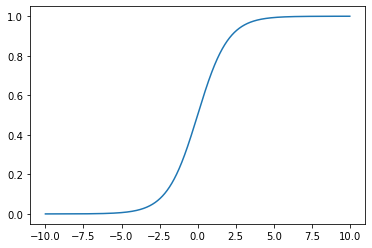

In [67]:
x_1=np.linspace(-10,10,10000)
y_1=1/(1+np.exp(-x_1))
plt.plot(x_1,y_1)
plt.show()

In [68]:
from sklearn.datasets import load_breast_cancer

In [69]:
cancer= load_breast_cancer()

In [70]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [71]:
X=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [72]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [73]:
y=cancer['target']

In [74]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [75]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1111)

In [76]:
knn_2=KNeighborsClassifier()

In [77]:
knn_2.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
knn_2_predict=knn_2.predict(X_test)

In [79]:
confusion_matrix(y_test,knn_2_predict)

array([[ 59,   8],
       [  4, 100]], dtype=int64)

In [80]:
print(classification_report(y_test,knn_2_predict))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.93      0.96      0.94       104

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [81]:
lrg2=LogisticRegression()

In [82]:
lrg2.fit(X_train,y_train)

C:\Users\arpna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
lrg2_predict=lrg2.predict(X_test)

In [84]:
confusion_matrix(y_test,lrg2_predict)

array([[ 62,   5],
       [  3, 101]], dtype=int64)

In [85]:
print(classification_report(y_test,lrg2_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.95      0.97      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [86]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(1,40):
    knn_new=KNeighborsClassifier(n_neighbors =i)   #changing no. of k values in this function
    knn_new.fit(X_test,y_test)
    knn_new_predict=knn_new.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_new_predict))

In [87]:
accuracy

[1.0,
 0.9590643274853801,
 0.935672514619883,
 0.9415204678362573,
 0.9473684210526315,
 0.9532163742690059,
 0.9298245614035088,
 0.9239766081871345,
 0.9181286549707602,
 0.9181286549707602,
 0.9122807017543859,
 0.9122807017543859,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9005847953216374,
 0.9064327485380117,
 0.9005847953216374,
 0.9064327485380117,
 0.9005847953216374,
 0.9064327485380117,
 0.8947368421052632,
 0.9005847953216374,
 0.8947368421052632,
 0.9005847953216374,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8947368421052632,
 0.8947368421052632,
 0.8888888888888888]

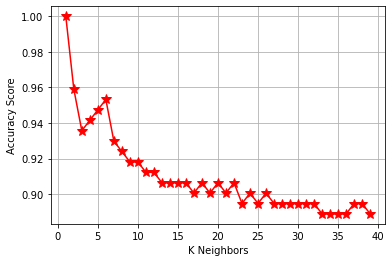

In [88]:
plt.plot(range(1,40),accuracy, marker='*',ms=10,color='red')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

In [89]:
knn_2=KNeighborsClassifier(6)
knn_2.fit(X_train,y_train)
knn_2_predict=knn_2.predict(X_test)
print(confusion_matrix(y_test,knn_2_predict))
print(classification_report(y_test,knn_2_predict))

[[ 59   8]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.93      0.96      0.94       104

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



## Decision Tree

In [90]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [91]:
X4=auto.drop(columns='origin')
y4=auto['origin']

In [92]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.3, random_state=12)

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt=DecisionTreeClassifier()

In [95]:
dt.fit(X4_train,y4_train)

DecisionTreeClassifier()

In [96]:
train4_predict=dt.predict(X4_train)
test4_predict=dt.predict(X4_test)

In [97]:
print('Train accuracy: ', accuracy_score(y4_train, train4_predict))
print('Test accuracy: ', accuracy_score(y4_test, test4_predict))

Train accuracy:  1.0
Test accuracy:  0.7916666666666666


In [98]:
X5=auto.drop(columns='mpg')
y5=auto['mpg']

In [99]:
X5

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [100]:
y5

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [101]:
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.3, random_state=12)

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rfr=RandomForestRegressor()

In [104]:
rfr.fit(X5_train,y5_train)

RandomForestRegressor()

In [105]:
y5_test.shape

(120,)

In [106]:
rfr_predict=rfr.predict(X5_test)

In [107]:
rfr_predict.shape

(120,)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(rfr_predict,y5_test)

6.412293816666665

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
dtr=DecisionTreeRegressor()

In [112]:
dtr.fit(X5_train,y5_train)

DecisionTreeRegressor()

In [113]:
dtr_predict=dtr.predict(X5_test)

In [114]:
mean_squared_error(y5_test,dtr_predict)

11.870083333333332

## Support Vector Machine

In [115]:
X5_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
7,8,440.0,215.0,4312,8.5,70,1
106,8,350.0,180.0,4499,12.5,73,1
249,8,260.0,110.0,3365,15.5,78,1
44,8,400.0,175.0,5140,12.0,71,1
195,4,85.0,52.0,2035,22.2,76,1


In [116]:
X6=X5
y6=y5
X6

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [118]:
X6.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64